In [33]:
import re
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import fuzz
import numpy as np

sys.path.append(os.path.abspath(".."))

from utils.db import fetch_sanctions

In [34]:
df = fetch_sanctions()
df.head()

,ent_num,sdn_name,sdn_type,program,title,call_sign,vess_type,tonnage,grt,vess_flag,...,add_num,address,complete_address,country,add_remarks,alt_num,alt_type,alt_name,alt_remarks,cleaned_name
0,36,AEROCARIBBEAN AIRLINES,None,CUBA,None,None,None,None,None,None,...,25,None,Havana,Cuba,None,12.0,aka,AERO-CARIBBEAN,None,AEROCARIBBEAN AIRLINES
1,173,"ANGLO-CARIBBEAN CO., LTD.",None,CUBA,None,None,None,None,None,None,...,129,"Ibex House, The Minories",London EC3N 1DY,United Kingdom,None,57.0,aka,AVIA IMPORT,None,ANGLO CARIBBEAN CO LTD
2,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,202,Federico Boyd Avenue & 51 Street,Panama City,Panama,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
3,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,200,Avenida de Concha Espina 8,Madrid E-28036,Spain,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
4,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,201,"Dai-Ichi Bldg. 6th Floor, 10-2 Nihombashi, 2-c...",Tokyo 103,Japan,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA


In [35]:
# Data Overview

df.info()
df.describe(include="all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49339 entries, 0 to 49338
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ent_num           49339 non-null  int64  
 1   sdn_name          49339 non-null  object 
 2   sdn_type          18657 non-null  object 
 3   program           49339 non-null  object 
 4   title             2380 non-null   object 
 5   call_sign         690 non-null    object 
 6   vess_type         1201 non-null   object 
 7   tonnage           107 non-null    object 
 8   grt               195 non-null    object 
 9   vess_flag         1277 non-null   object 
 10  vess_owner        6 non-null      object 
 11  remarks           48414 non-null  object 
 12  add_num           49339 non-null  int64  
 13  address           30380 non-null  object 
 14  complete_address  34859 non-null  object 
 15  country           44321 non-null  object 
 16  add_remarks       0 non-null      object

ent_num                 0
sdn_name                0
sdn_type            30682
program                 0
title               46959
call_sign           48649
vess_type           48138
tonnage             49232
grt                 49144
vess_flag           48062
vess_owner          49333
remarks               925
add_num                 0
address             18959
complete_address    14480
country              5018
add_remarks         49339
alt_num             11171
alt_type            11171
alt_name            11171
alt_remarks         49339
cleaned_name            0
dtype: int64

In [36]:
# Sanity check for uniqueness
df['ent_num'].nunique(), df.duplicated().sum()

(17852, np.int64(0))

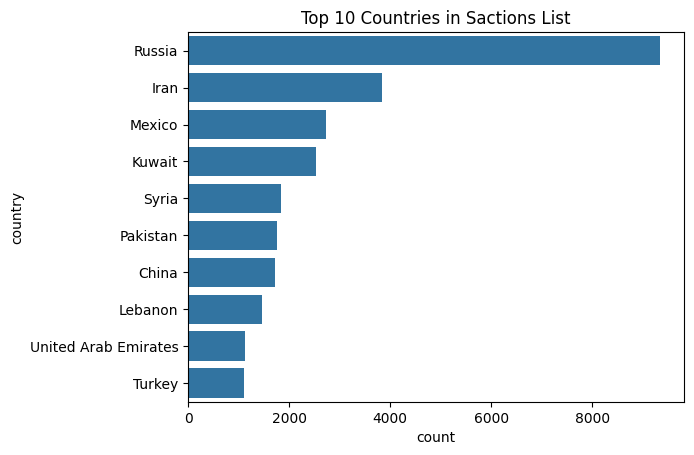

In [37]:
# Data Distribution (Exploratory Visuals)

sns.countplot(data=df, y='country', order=df['country'].value_counts().head(10).index)
plt.title("Top 10 Countries in Sactions List")
plt.show()

<Axes: title={'center': 'SDN Types Distribution'}, ylabel='sdn_type'>

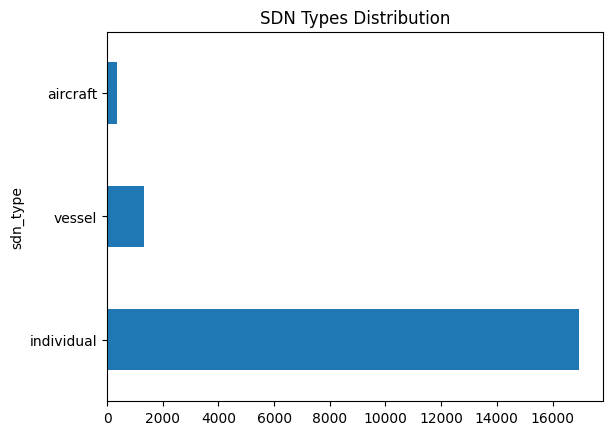

In [38]:
df['sdn_type'].value_counts().plot(kind='barh', title="SDN Types Distribution")

In [39]:
# Data Cleaning

def standardize_name(name: str) -> str:
    if pd.isnull(name):
        return ''
    name = re.sub(r"[/-]", " ", name).upper()
    name = re.sub(r"[^A-Z\s]", "", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

df['cleaned_name'] = df['sdn_name'].apply(standardize_name)

df.head(10)

,ent_num,sdn_name,sdn_type,program,title,call_sign,vess_type,tonnage,grt,vess_flag,...,add_num,address,complete_address,country,add_remarks,alt_num,alt_type,alt_name,alt_remarks,cleaned_name
0,36,AEROCARIBBEAN AIRLINES,None,CUBA,None,None,None,None,None,None,...,25,None,Havana,Cuba,None,12.0,aka,AERO-CARIBBEAN,None,AEROCARIBBEAN AIRLINES
1,173,"ANGLO-CARIBBEAN CO., LTD.",None,CUBA,None,None,None,None,None,None,...,129,"Ibex House, The Minories",London EC3N 1DY,United Kingdom,None,57.0,aka,AVIA IMPORT,None,ANGLO CARIBBEAN CO LTD
2,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,202,Federico Boyd Avenue & 51 Street,Panama City,Panama,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
3,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,200,Avenida de Concha Espina 8,Madrid E-28036,Spain,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
4,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,201,"Dai-Ichi Bldg. 6th Floor, 10-2 Nihombashi, 2-c...",Tokyo 103,Japan,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
5,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,199,Zweierstrasse 35,Zurich CH-8022,Switzerland,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
6,424,BOUTIQUE LA MAISON,None,CUBA,None,None,None,None,None,None,...,247,42 Via Brasil,Panama City,Panama,None,NaN,None,None,None,BOUTIQUE LA MAISON
7,475,CASA DE CUBA,None,CUBA,None,None,None,None,None,None,...,272,None,None,Mexico,None,NaN,None,None,None,CASA DE CUBA
8,475,CASA DE CUBA,None,CUBA,None,None,None,None,None,None,...,271,None,None,Spain,None,NaN,None,None,None,CASA DE CUBA
9,480,"CECOEX, S.A.",None,CUBA,None,None,None,None,None,None,...,276,None,Panama City,Panama,None,NaN,None,None,None,CECOEX SA


In [40]:
df.to_csv('../data/sanctions_cleaned.csv', index=False)

In [41]:
# Feature Engineering

def get_fuzz_ratio(name1: str, name2: str) -> float:
    name1 = " ".join(sorted(name1.split()))
    name2 = " ".join(sorted(name2.split()))

    try:
        return round(fuzz.ratio(name1, name2), 2)
    except:
        return 0

def get_length_difference(name1: str, name2: str) -> int:
    return abs(len(name1) - len(name2))

def get_common_token_count(name1: str, name2: str) -> int:
    return len(set(name1.split()) & set(name2.split()))
    
df['name_length'] = df['cleaned_name'].str.len()
df['word_count'] = df['cleaned_name'].str.split().apply(len)
df['has_country_in_name'] = df.apply(
    lambda row: 1 if row['country'] and row['country'].upper() in row['cleaned_name'] else 0,
    axis=1
)

# Text similarity features
reference_name = standardize_name("REVIVAL OF SOCIETY")
df['fuzz_ratio_reference'] = reference_name
df['fuzz_ratio'] = df['cleaned_name'].apply(lambda x: get_fuzz_ratio(x, reference_name))
df['length_diff'] = df['cleaned_name'].apply(lambda x: get_length_difference(x, reference_name))
df['common_token_count'] = df['cleaned_name'].apply(lambda x: get_common_token_count(x, reference_name))

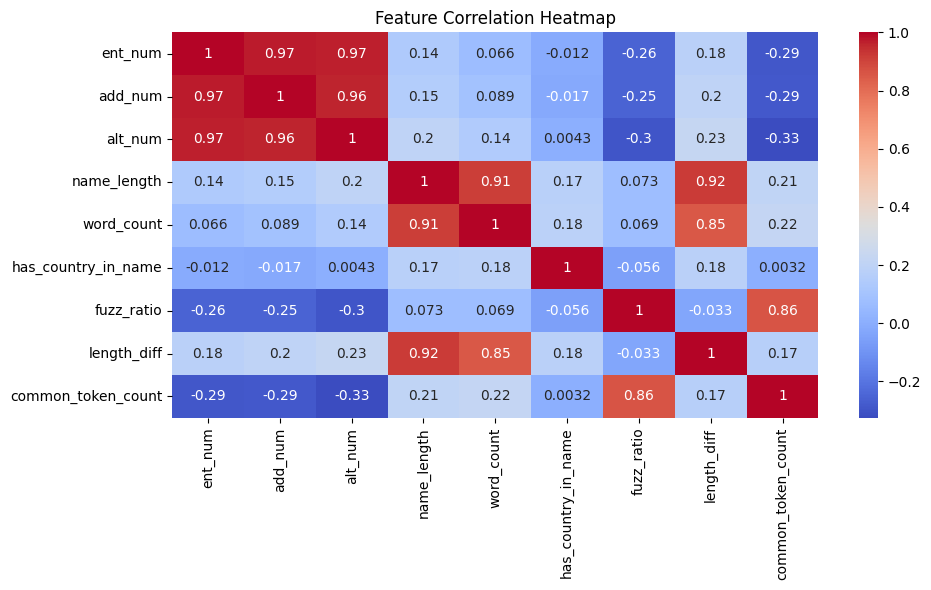

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [43]:
final_features = [
    'ent_num',
    'cleaned_name',
    'fuzz_ratio_reference',
    'name_length',
    'word_count',
    'has_country_in_name',
    'fuzz_ratio',
    'length_diff',
    'common_token_count'
]

df[final_features].to_csv('../data/sanctions_features.csv', index=False)